In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import matplotlib as mpl


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
backcall            0.1.0
cached_property     1.5.2
cairo               1.18.1
cffi                1.13.2
cloudpickle         1.2.2
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.0
dask                2.4.0
dateutil            2.8.0
decorator           4.4.0
get_version         2.1
h5py                3.1.0
igraph              0.7.1
ipykernel           5.1.2
ipython_genutils    0.2.0
ipywidge

In [2]:
adata = sc.read('/lustre/scratch126/cellgen/team298/hg6/Fetal_skin/data/fetalskin_all_new4.h5ad')

In [4]:
adata.obs

,sanger_id,chemistry,donor,gender,pcw,sorting,sample,chemistry_sorting,cell_caller,scrublet_score,...,independent_annotation_refined_20220201b,independent_annotation_broad1_20220201,independent_annotation_broad2_20220201,independent_annotation_broad3_20220201,joint_annotation_20220201a,joint_annotation_20220201b,fig1b_annotation_20220201,independent_annotation_refined_20220202,fig1b_annotation_20220202,joint_annotation_20220202
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGGTCAGTGGA-1-4834STDY7002879,4834STDY7002879,SC3Pv2,F16,male,8,CD45P,F16_male_8+1PCW,SC3Pv2_CD45P,Both,0.225806,...,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage1,Macrophage,Macrophage,LYVE1++ macrophage,Macrophage,LYVE1++ macrophage
AAAGATGGTCGATTGT-1-4834STDY7002879,4834STDY7002879,SC3Pv2,F16,male,8,CD45P,F16_male_8+1PCW,SC3Pv2_CD45P,Both,0.149606,...,Monocyte (activated/differentiating),Monocyte,Monocyte,Monocyte,Monocyte (activated/differentiating),Monocyte (activated/differentiating),Monocyte,Monocyte (activated/differentiating),Monocyte,Monocyte (activated/differentiating)
AAAGCAAAGATGTGGC-1-4834STDY7002879,4834STDY7002879,SC3Pv2,F16,male,8,CD45P,F16_male_8+1PCW,SC3Pv2_CD45P,Both,0.201970,...,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage1,Macrophage,Macrophage,LYVE1++ macrophage,Macrophage,LYVE1++ macrophage
AAAGTAGCAGATCGGA-1-4834STDY7002879,4834STDY7002879,SC3Pv2,F16,male,8,CD45P,F16_male_8+1PCW,SC3Pv2_CD45P,Both,0.164557,...,Eo/baso/mast cell progenitor,Granulocyte progenitor,Granulocyte progenitor,Granulocyte progenitor,Eo/baso/mast cell progenitor,Eo/baso/mast cell progenitor,Progenitor,Eo/baso/mast cell progenitor,Progenitor,Eo/baso/mast cell progenitor
AAAGTAGTCCGCATCT-1-4834STDY7002879,4834STDY7002879,SC3Pv2,F16,male,8,CD45P,F16_male_8+1PCW,SC3Pv2_CD45P,Both,0.181818,...,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage1,Macrophage,Macrophage,LYVE1++ macrophage,Macrophage,LYVE1++ macrophage
AAATGCCAGCTGCCCA-1-4834STDY7002879,4834STDY7002879,SC3Pv2,F16,male,8,CD45P,F16_male_8+1PCW,SC3Pv2_CD45P,Both,0.254438,...,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage1,Macrophage,Macrophage,LYVE1++ macrophage,Macrophage,LYVE1++ macrophage
AAATGCCTCGTGGTCG-1-4834STDY7002879,4834STDY7002879,SC3Pv2,F16,male,8,CD45P,F16_male_8+1PCW,SC3Pv2_CD45P,Both,0.289474,...,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage1,Macrophage,Macrophage,LYVE1++ macrophage,Macrophage,LYVE1++ macrophage
AACACGTAGAGAGCTC-1-4834STDY7002879,4834STDY7002879,SC3Pv2,F16,male,8,CD45P,F16_male_8+1PCW,SC3Pv2_CD45P,Both,0.333333,...,DC2,DC2,cDC,DC,DC2,DC2,cDC,DC2,cDC,DC2
AACCATGAGATCTGCT-1-4834STDY7002879,4834STDY7002879,SC3Pv2,F16,male,8,CD45P,F16_male_8+1PCW,SC3Pv2_CD45P,Both,0.149606,...,DC2,DC2,cDC,DC,DC2,DC2,cDC,DC2,cDC,DC2


In [5]:
adata.obs.columns

Index(['sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample',
       'chemistry_sorting', 'cell_caller', 'scrublet_score',
       'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts',
       'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb',
       'independent_annotation_refined', 'independent_annotation_broad1',
       'independent_annotation_broad2', 'independent_annotation_broad3',
       'independent_annotation_broad4', 'independent_annotation_broad5',
       'joint_annotation', 'is_maternal', 'fig1b_annotation',
       'independent_annotation_refined_20220201a',
       'independent_annotation_refined_20220201b',
       'independent_annotation_broad1_20220201',
       'independent_annotation_broad2_20220201',
       'independent_annotation_broad3_20220201', 'joint_annotation_20220201a',
       'joint_annotation_20220201b', 'fig1b_annotation_20220201',
       'independent_annotation_refined_20220202', 'fig1b_annotation_20220202',
       'j

In [6]:
adata.obs.pcw.unique()

array([ 8,  9, 10,  7, 13, 16, 12, 15, 11, 14])

In [7]:
list(adata.obs.fig1b_annotation_20220202.unique()) 

['Macrophage',
 'Monocyte',
 'Progenitor',
 'cDC',
 'Fibroblast',
 'ILC',
 'B cell',
 'T cell',
 'Lymphatic endothelium',
 'Skeletal muscle',
 'pDC',
 'Mast cell',
 'Vascular endothelium',
 'Neutrophil',
 'Langerhans cell',
 'Megakaryocyte',
 'Erythroid',
 'Myofibroblast',
 'Mural cell',
 'Neuronal cells',
 'Schwann cell',
 'Adipocyte',
 'Keratinocyte',
 'Melanocyte',
 'Dermal papillia']

In [10]:
adata.obs['fig1b_annotation_20230519'] = adata.obs['fig1b_annotation_20220202'].replace(
['cDC',
 'Langerhans cell',
 'pDC',
 'Dermal papillia',
 'Myofibroblast'],
['DC',
 'DC',
 'DC',
 'Fibroblast',
 'Fibroblast']
)

In [11]:
adata.obs["fig1b_annotation_20230519"] = adata.obs["fig1b_annotation_20230519"].astype('category')
adata.obs["fig1b_annotation_20230519"].cat.categories

Index(['Adipocyte', 'B cell', 'DC', 'Erythroid', 'Fibroblast', 'ILC',
       'Keratinocyte', 'Lymphatic endothelium', 'Macrophage', 'Mast cell',
       'Megakaryocyte', 'Melanocyte', 'Monocyte', 'Mural cell',
       'Neuronal cells', 'Neutrophil', 'Progenitor', 'Schwann cell',
       'Skeletal muscle', 'T cell', 'Vascular endothelium'],
      dtype='object')

In [12]:
adata.obs["fig1b_annotation_20230519"] = adata.obs["fig1b_annotation_20230519"].cat.reorder_categories([
    'Progenitor',
    'ILC',
    'T cell',
    'B cell',
    'DC',
    'Macrophage',
    'Monocyte',
    'Neutrophil',
    'Mast cell',
    'Megakaryocyte',
    'Erythroid',
    'Vascular endothelium',
    'Lymphatic endothelium',
    'Mural cell',
    'Skeletal muscle',
    'Fibroblast',
    'Adipocyte',
    'Schwann cell',
    'Neuronal cells',
    'Melanocyte',
    'Keratinocyte'])

## Plotting markers per cell type

In [35]:
markers_dict = {'Progenitor': ['PRSS57', 'SPINK2'],
                'ILC': ['KLRB1', 'IL7R'],
                'T cell': ['CD27', 'CD3E'],
                'B cell': ['CD79A', 'MS4A1'],
                'DC': ['CLEC10A', 'IRF7'],
                'Macrophage': ['RNASE1', 'MRC1'],
                'Monocyte': ['FCN1', 'LILRA5'],
                'Neutrophil': ['PGLYRP1', 'CEACAM8'],
                'Mast cell': ['TPSAB1', 'CPA3'],
                'Megakaryocyte': ['PPBP', 'PF4'],
                'Erythroid': ['ALAS2', 'HBA1'],
                'Vascular endothelium': ['PLVAP', 'CD34'],
                'Lymphatic endothelium': ['CCL21', 'TFF3'],
                'Mural cell': ['ACTA2', 'TAGLN'],
                'Skeletal muscle': ['SGCA', 'NPY'],
                'Fibroblast': ['COL1A1', 'PDGFD'],
                'Adipocyte': ['LPL', 'DKK2'],
                'Schwann cell': ['GFRA3', 'MPZ'],
                'Neuronal cells': ['TAGLN3', 'ELAVL4'],
                'Melanocyte': ['PMEL', 'TYRP1'],
                'Keratinocyte': ['EPCAM', 'KRT17']}

/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/_core/anndata.py:1210: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


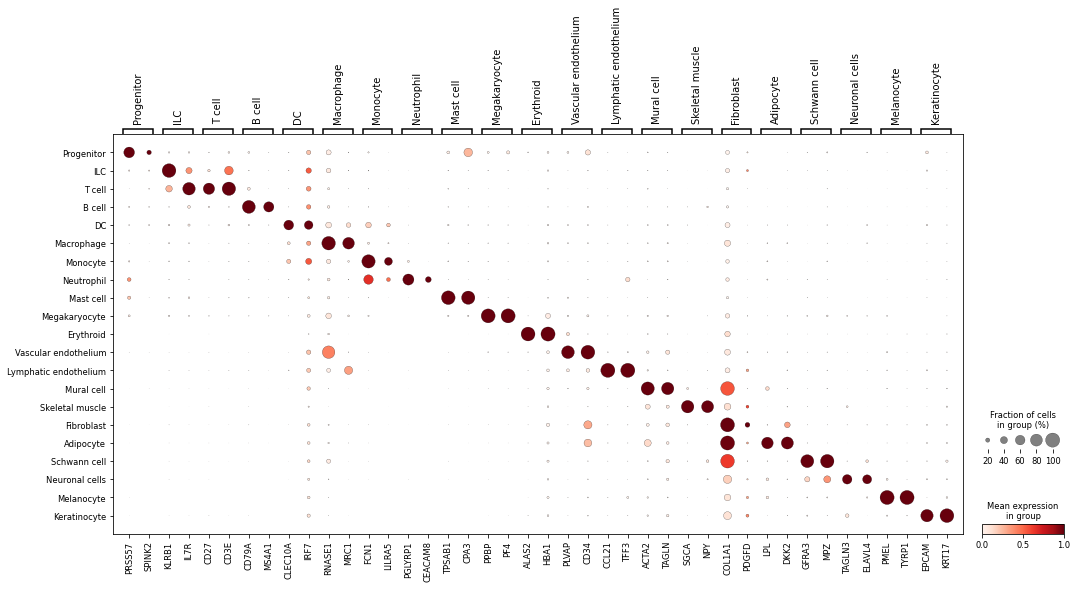

In [38]:
sc.pl.dotplot(adata, markers_dict, groupby='fig1b_annotation_20230519', standard_scale='var', save='fig_ed1c.pdf')

/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/_core/anndata.py:1210: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


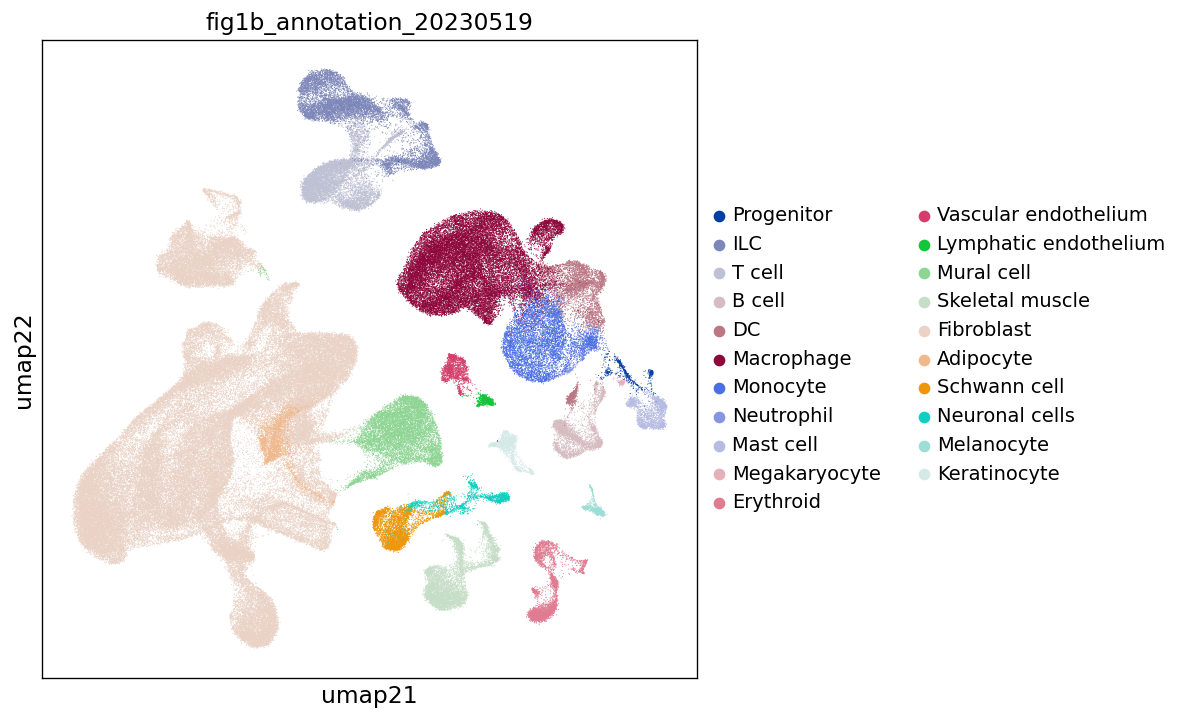

In [45]:
sc.set_figure_params(figsize=[7,7],dpi=120, dpi_save=300)
sc.pl.embedding(adata, basis='umap2',color = "fig1b_annotation_20230519", legend_fontsize='small',size=1.5,save='fig_1b_umap.pdf')

/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/_core/anndata.py:1210: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


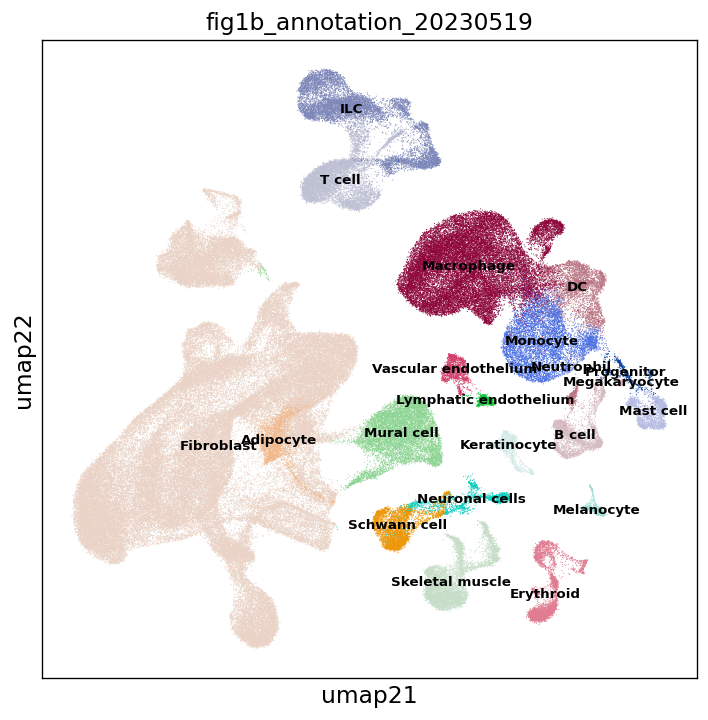

In [41]:
sc.pl.embedding(adata, basis='umap2',color = "fig1b_annotation_20230519", legend_fontsize='xx-small',size=1.5,legend_loc='on data')